Mickaël Tits - CETIC asbl - https://www.cetic.be/Mickael-Tits?lang=fr - 03/07/2019

Copyright: CETIC asbl - 2019

License: [CC BY 2.0 BE](https://creativecommons.org/licenses/by/2.0/be/)

# FR - Notes d'introduction

Ce notebook accompagne et illustre l'article sur la super-résolution suivant, publié par le CETIC dans le cadre de la [Deep Learning Academy](https://deep-learning-academy.github.io/): https://docs.google.com/document/d/1XUFQAgdzNDIg7zXevipnMst7eMTujhB0y_XNJYEhWgY/edit?usp=sharing

Les images de tests sont placées dans le dossier '/opt/notebooks/MyImages'.

Les résultats obtenus par les différents modèles sont placés dans le dossier: '/opt/notebooks/MyResults'.

Vous pouvez décommenter certaines lignes pour charger et tester plus de modèles.

## Notes additionnelles si vous voulez tester les modèles sur vos propres images

Des images valides pour la plupart des algorithmes sont le format .PNG. La taille des images prises en charge par les modèles dépend du GPU, du modèle testé et des options de super-résolution.

Certains des algorithmes permettant une stratégie de découpage de l'image d'entrée pour permettre de traiter des images plus grandes. Les images de taille 500x500 pixels devraient fonctionner dans la pulpart des cas dans Google Colab si vous avez la chance d'avoir un GPU Tesla T4 assigné à votre session,les images devront être un peu réduites pour utilisation avec une K80. Les images de l'ordre de 1000x1000 ne fonctionneront pas avec certains modèles, plus particulièrement ceux proposant un grand taux d'agrandissement (x8). Pour ceux qui veulent s'y essayer, cela pourrait cependant fonctionner avec les modèles SRFBN x4, WDSR x4 et DBPN x4.

# EN - Introduction notes
Test images will be put in folder '/opt/notebooks/MyImages'.

Model outputs will be put in folder '/opt/notebooks/MyResults'.

You can uncomment some lines to download and test more models.

## Notes if you want to try with your own images

Acceptable images for most algorithms should be in png format. The acceptable size depends on your GPU, on the model you are trying and on the scaling option.

Note that some algorithms allow chopping strategy to allow the use of larger images. Images around 500x500 should work in most cases with Google colab Tesla T4, maybe not with K80. Images around 1000x1000 won't work with some models, especially with a very large scaling option (like x8). It could work with SRFBN x4, WDSR x4 and DBPN x4.

In [1]:
!nvidia-smi

Fri Jul 29 11:24:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.72       Driver Version: 512.72       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P8     9W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [61]:
! pip install scipy==1.0.0
#if it is asked, you should restart runtime after this installation


In [5]:
import os
os.chdir('/opt/notebooks/')
!rm -r '/opt/notebooks/MyImages'
!mkdir '/opt/notebooks/MyImages'

In [6]:
import os
os.chdir('/opt/notebooks/')
!rm -r '/opt/notebooks/Myresults'
!mkdir '/opt/notebooks/Myresults'

rm: cannot remove '/opt/notebooks/Myresults': No such file or directory


In [3]:
#Download imges from git repo:
import os
os.chdir('/opt/notebooks/')
!git clone "https://github.com/titsitits/Test_images_superresolution"

os.chdir("/opt/notebooks/Test_images_superresolution/")
filenames = os.listdir()
for filename in filenames:
  os.rename(filename, filename.lower())


Cloning into 'Test_images_superresolution'...
remote: Enumerating objects: 154, done.
remote: Total 154 (delta 0), reused 0 (delta 0), pack-reused 154
Receiving objects: 100% (154/154), 80.20 MiB | 6.28 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
! cp /opt/notebooks/Test_images_superresolution/*.{jpg,png,JPG,PNG} /opt/notebooks/MyImages
! rm -r /opt/notebooks/Test_images_superresolution/
#You could also add your own images. However, note that some of the tested methods are capricious (particularly SRFBN) and do not work with all images.


cp: cannot stat '/opt/notebooks/Test_images_superresolution/*.png': No such file or directory
cp: cannot stat '/opt/notebooks/Test_images_superresolution/*.JPG': No such file or directory
cp: cannot stat '/opt/notebooks/Test_images_superresolution/*.PNG': No such file or directory


In [8]:
#convert all images from /opt/notebooks/MyImages in a compatible format for most models 
from PIL import Image
import glob
for myfile in glob.glob('/opt/notebooks/MyImages/*'):
  f, e = os.path.splitext(myfile)
  myim = Image.open(myfile)
  os.remove(myfile)
  myim.save(f+".png")

# WDSR - EDSR - SRGAN - "Keras-based implementation of WDSR, EDSR and SRGAN for single image super-resolution "
https://github.com/krasserm/super-resolution

   - Wide Activation for Efficient and Accurate Image Super-Resolution (WDSR), winner of the NTIRE 2018 super-resolution challenge.
   - Enhanced Deep Residual Networks for Single Image Super-Resolution (EDSR), winner of the NTIRE 2017 super-resolution challenge.
   - Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network (SRGAN).


In [9]:
#Download github repository
import os
os.chdir('/opt/notebooks')
!git clone "https://github.com/krasserm/super-resolution"

Cloning into 'super-resolution'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 408 (delta 0), reused 2 (delta 0), pack-reused 405
Receiving objects: 100% (408/408), 48.16 MiB | 313.00 KiB/s, done.
Resolving deltas: 100% (214/214), done.


In [5]:
#Download models
import os
os.chdir('/opt/notebooks/super-resolution/model')

#baseline (EDSR)
#!wget -O 'edsr-16-x2-psnr-34.6356.h5' --no-check-certificate "https://docs.google.com/uc?export=download&id=1oATD-iXlQpcE2mIIEd4-9FOk2Xt5N8oX"
#lightest model
#!wget -O 'wdsr-a-16-x2-psnr-34.6816.h5' --no-check-certificate "https://docs.google.com/uc?export=download&id=1WmuSpNamFSszQOafrno05o1nDN4QjMeq"
#best PSNR
#!wget -O 'wdsr-a-32-x2-psnr-34.8033.h5' --no-check-certificate "https://docs.google.com/uc?export=download&id=1V4XHMFZo35yB_NTaD0dyw1_plS-78-Ju"
#aqui em baixo
# !wget -O 'wdsr-a-32-x4-psnr-29.1736.h5' --no-check-certificate "https://docs.google.com/uc?export=download&id=1ZTIz1YVXFTI2z3rvBfVuBSthJLJZivxC"
#srgan with edsr generator (pre-trained and fine-tuned) (edsr gives the psnr, the gan ensures the photo is realistic)
#!wget -O 'edsr-16-x4-gen-pre-psnr-28.8885.h5' --no-check-certificate "https://docs.google.com/uc?export=download&id=1V4XHMFZo35yB_NTaD0dyw1_plS-78-Ju"
#aqui em baixo
# !wget -O 'edsr-16-x4-gen-epoch-088.h5' --no-check-certificate "https://docs.google.com/uc?export=download&id=1Z7PhioyvTzLBOdrg6c4RNEP9JEIqudwP"
!tar -xf weights-srgan.tar.gz
!conda env create -f environment.yml


os.chdir('../')


EnvironmentFileNotFound: '/opt/notebooks/super-resolution/model/environment.yml' file not found



In [14]:
#Apply models on test images
import os
os.chdir('/opt/notebooks/super-resolution')

#uncomment to test
#!python demo.py -i /opt/notebooks/MyImages -o /opt/notebooks/output_edsr_x2 --model /opt/notebooks/model/edsr-16-x2-psnr-34.6356.h5
#!mkdir -p /opt/notebooks/Myresults/output_edsr_x2/
#!cp /opt/notebooks/output_edsr_x2/*.png /opt/notebooks/Myresults/output_edsr_x2/

#uncomment to test
#!python demo.py -i /opt/notebooks/MyImages -o /opt/notebooks/output_wdsr_x2 --model /opt/notebooks/model/wdsr-a-16-x2-psnr-34.6816.h5
#!mkdir -p /opt/notebooks/Myresults/output_wdsr_x2/
#!cp /opt/notebooks/output_wdsr_x2/*.png /opt/notebooks/Myresults/output_wdsr_x2/

!python demo.py -i /opt/notebooks/MyImages -o /opt/notebooks/output_wdsr_x4 --model /opt/notebooks/model/wdsr-a-32-x4-psnr-29.1736.h5
!mkdir -p /opt/notebooks/Myresults/output_wdsr_x4/
!cp /opt/notebooks/output_wdsr_x4/*.png /opt/notebooks/Myresults/output_wdsr_x4/

!python demo.py -i /opt/notebooks/MyImages -o /opt/notebooks/srgan_x4 --model /opt/notebooks/model/edsr-16-x4-gen-epoch-088.h5
!mkdir -p /opt/notebooks/Myresults/srgan_x4/
!cp /opt/notebooks/srgan_x4/*.png /opt/notebooks/Myresults/srgan_x4/

python: can't open file 'demo.py': [Errno 2] No such file or directory
cp: cannot stat '/opt/notebooks/output_wdsr_x4/*.png': No such file or directory
python: can't open file 'demo.py': [Errno 2] No such file or directory
cp: cannot stat '/opt/notebooks/srgan_x4/*.png': No such file or directory


# Enhanced SRGAN
https://github.com/xinntao/ESRGAN


In [16]:
#Download github repository
import os
os.chdir('/opt/notebooks')
!git clone https://github.com/xinntao/ESRGAN

fatal: destination path 'ESRGAN' already exists and is not an empty directory.


In [17]:
#Download models
import os
os.chdir('/opt/notebooks/ESRGAN')
#old architecture
#!wget -O './models/RRDB_ESRGAN_x4.pth' --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MJFgqXJrMkPdKtiuy7C6xfsU1QIbXEb-'
#!wget -O './models/RRDB_PSNR_x4.pth' --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mSJ6Z40weL-dnPvi390xDd3uZBCFMeqr'
#convert models for new architecture
#!python transer_RRDB_models.py

#or download new architecture
!wget -O './models/RRDB_ESRGAN_x4.pth' --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene'
!wget -O './models/RRDB_PSNR_x4.pth' --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pJ_T-V1dpb1ewoEra1TGSWl5e6H7M4NN'


--2022-07-29 11:38:37--  https://docs.google.com/uc?export=download&id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene
Resolving docs.google.com (docs.google.com)... 142.251.129.78, 2800:3f0:4004:80b::200e
Connecting to docs.google.com (docs.google.com)|142.251.129.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5r8ghio83944pclvh7skl0tntsn8vm20/1659094650000/15659024415184981874/*/1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene?e=download&uuid=abc6a6d3-c3fc-4019-b1f5-6434d0a3c7fc [following]
--2022-07-29 11:38:40--  https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5r8ghio83944pclvh7skl0tntsn8vm20/1659094650000/15659024415184981874/*/1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene?e=download&uuid=abc6a6d3-c3fc-4019-b1f5-6434d0a3c7fc
Resolving doc-0k-4k-docs.googleusercontent.com (doc-0k-4k-docs.googleusercontent.com)... 142.250.218.97, 2800:3f0:4004:80e::200

In [20]:
#Apply models on test images
!mkdir -p /opt/notebooks/ESRGAN/LR/
!cp /opt/notebooks/MyImages/*.png /opt/notebooks/ESRGAN/LR/

import os
os.chdir('/opt/notebooks/ESRGAN')

#more realistic image (gan)
!python test.py models/RRDB_ESRGAN_x4.pth
!mkdir -p /opt/notebooks/Myresults/ESRGAN_x4/
!cp /opt/notebooks/ESRGAN/results/*.png /opt/notebooks/Myresults/ESRGAN_x4/

#closer to original image (psnr max)
!python test.py models/RRDB_PSNR_x4.pth
!mkdir -p /opt/notebooks/Myresults/ESRGAN_PSNR_x4/
!cp /opt/notebooks/ESRGAN/results/*.png /opt/notebooks/Myresults/ESRGAN_PSNR_x4/

#create interpolation between both network (0.8 esrgan + 0.2 psnr)
!python net_interp.py 0.8
!python test.py models/interp_08.pth
!mkdir -p /opt/notebooks/Myresults/ESRGAN_INTERP_x4/
!cp /opt/notebooks/ESRGAN/results/*.png /opt/notebooks/Myresults/ESRGAN_INTERP_x4/

Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 stranger2
2 microscopy
3 stranger3
4 microscopy3
5 watch
6 car
7 face
8 robbery
9 stranger1
10 history
11 comic
12 eye
13 microscopy2
14 books2
15 baboon
16 history2
17 books
18 hubble
19 foule
20 foule2
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 stranger2
2 microscopy
3 stranger3
4 microscopy3
5 watch
6 car
7 face
8 robbery
9 stranger1
10 history
11 comic
12 eye
13 microscopy2
14 books2
15 baboon
16 history2
17 books
18 hubble
19 foule
20 foule2
Interpolating with alpha =  0.8
Model path models/RRDB_ESRGAN_x4.pth. 
Testing...
1 stranger2
2 microscopy
3 stranger3
4 microscopy3
5 watch
6 car
7 face
8 robbery
9 stranger1
10 history
11 comic
12 eye
13 microscopy2
14 books2
15 baboon
16 history2
17 books
18 hubble
19 foule
20 foule2


# DBPN - Deep Back-Projection Networks for Super-Resolution (CVPR2018)
https://github.com/alterzero/DBPN-Pytorch

In [21]:
#Download github repository
import os
os.chdir('/opt/notebooks')
!git clone "https://github.com/alterzero/DBPN-Pytorch"

Cloning into 'DBPN-Pytorch'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 220 (delta 0), reused 1 (delta 0), pack-reused 217
Receiving objects: 100% (220/220), 443.38 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (103/103), done.
Updating files: 100% (41/41), done.


In [22]:
#Download models
import os
os.chdir('/opt/notebooks/DBPN-Pytorch')
#!wget --no-check-certificate -O DBPN_x2.pth "https://docs.google.com/uc?export=download&id=108YVNWdC2wxqlPr1vqeJKBtnBwqQvj76"
!wget --no-check-certificate -O DBPN_x4.pth "https://docs.google.com/uc?export=download&id=1vkr7vrypm3SCBWN0YyeiYNbHrvnwtQKj"
#!wget --no-check-certificate -O DBPN_x8.pth "https://docs.google.com/uc?export=download&id=1La1BvYtpLR4Ah1VCUvL59TcXpbG2ogkM"
#!wget --no-check-certificate -O DBPNLL_x8.pth "https://docs.google.com/uc?export=download&id=1gyRZNMJrjWp-2JXWje0o9jd6igbSx1CZ"


--2022-07-29 11:50:08--  https://docs.google.com/uc?export=download&id=1vkr7vrypm3SCBWN0YyeiYNbHrvnwtQKj
Resolving docs.google.com (docs.google.com)... 142.250.79.46, 2800:3f0:4004:80b::200e
Connecting to docs.google.com (docs.google.com)|142.250.79.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/48n0idqr2hjfhrtmc7k925dgiffk22rf/1659095400000/11354233073230836630/*/1vkr7vrypm3SCBWN0YyeiYNbHrvnwtQKj?e=download&uuid=0c8bdbd6-75e0-4bcb-bb75-162c617e9f3d [following]
--2022-07-29 11:50:10--  https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/48n0idqr2hjfhrtmc7k925dgiffk22rf/1659095400000/11354233073230836630/*/1vkr7vrypm3SCBWN0YyeiYNbHrvnwtQKj?e=download&uuid=0c8bdbd6-75e0-4bcb-bb75-162c617e9f3d
Resolving doc-0o-8g-docs.googleusercontent.com (doc-0o-8g-docs.googleusercontent.com)... 142.250.218.97, 142.251.134.97, 2800:3f0

In [24]:
#Apply models on test images
import os
os.chdir('/opt/notebooks/DBPN-Pytorch')

#faster without chopping but requires more GPU memory

!rm -r /opt/notebooks/DBPN-Pytorch/Results/MyImages/

#Uncomment to test
#!python eval.py --upscale_factor 2 --input_dir '/opt/notebooks/' --test_dataset 'MyImages' --model_type 'DBPN' --model './DBPN_x2.pth' --chop_forward True
#!rm -r /opt/notebooks/Myresults/DBPN_x2_noensemble/
#!mkdir -p /opt/notebooks/Myresults/DBPN_x2_noensemble/
#!cp /opt/notebooks/DBPN-Pytorch/Results/MyImages/*.png /opt/notebooks/Myresults/DBPN_x2_noensemble/

!python eval.py --upscale_factor 4 --input_dir '/opt/notebooks/' --test_dataset 'MyImages' --model_type 'DBPN' --model './DBPN_x4.pth' --chop_forward True
!rm -r /opt/notebooks/Myresults/DBPN_x4_noensemble/
!mkdir -p /opt/notebooks/Myresults/DBPN_x4_noensemble/
!cp /opt/notebooks/DBPN-Pytorch/Results/MyImages/*.png /opt/notebooks/Myresults/DBPN_x4_noensemble/

#!python eval.py --upscale_factor 4 --input_dir '/opt/notebooks/' --test_dataset 'MyImages' --model_type 'DBPN' --model './DBPN_x4.pth'
#!rm -r /opt/notebooks/Myresults/DBPN_x4_noensemble_nochop/
#!mkdir -p /opt/notebooks/Myresults/DBPN_x4_noensemble_nochop/
#!cp /opt/notebooks/DBPN-Pytorch/Results/MyImages/*.png /opt/notebooks/Myresults/DBPN_x4_noensemble_nochop/

#uncomment to test
#!python eval.py --upscale_factor 8 --input_dir '/opt/notebooks/' --test_dataset 'MyImages' --model_type 'DBPN' --model './DBPN_x8.pth' --chop_forward True
#!rm -r /opt/notebooks/Myresults/DBPN_x8_noensemble/
#!mkdir -p /opt/notebooks/Myresults/DBPN_x8_noensemble/
#!cp /opt/notebooks/DBPN-Pytorch/Results/MyImages/*.png /opt/notebooks/Myresults/DBPN_x8_noensemble/



#this one fails so far...
#!python eval.py --upscale_factor 8 --chop_forward True --input_dir '../' --test_dataset 'MyImages' --model_type 'DBPNLL' --model './DBPNLL_x8.pth'

#!mkdir -p /opt/notebooks/Myresults/DBPNLL_x8_chop_noresidue_noensemble/
#!cp /opt/notebooks/DBPN-Pytorch/Results/MyImages/*.png /opt/notebooks/Myresults/DBPNLL_x8_chop_noresidue_noensemble/

Namespace(chop_forward=True, gpu_mode=True, gpus=1, input_dir='/opt/notebooks/', model='./DBPN_x4.pth', model_type='DBPN', output='Results/', residual=False, seed=123, self_ensemble=False, testBatchSize=1, test_dataset='MyImages', threads=1, upscale_factor=4)
===> Loading datasets
===> Building model
Pre-trained SR model is loaded.
===> Processing: stranger2.png || Timer: 0.1419 sec.
===> Processing: microscopy.png || Timer: 0.0541 sec.
===> Processing: stranger3.png || Timer: 0.0567 sec.
===> Processing: microscopy3.png || Timer: 0.0491 sec.
===> Processing: watch.png || Timer: 0.0422 sec.
===> Processing: car.png || Timer: 0.0466 sec.
===> Processing: face.png || Timer: 0.1176 sec.
===> Processing: robbery.png || Timer: 0.1109 sec.
===> Processing: stranger1.png || Timer: 0.0500 sec.
===> Processing: history.png || Timer: 0.0387 sec.
===> Processing: eye.png || Timer: 0.0561 sec.
===> Processing: microscopy2.png || Timer: 0.0593 sec.
===> Processing: books2.png || Timer: 0.0420 sec.


# SRFBN - "Feedback Network for Image Super-Resolution" (CVPR2019) 
https://github.com/Paper99/SRFBN_CVPR19

Notes:

Ce projet est en fait plus générique que la super-résolution seule. Plusieurs modèles ont en fait été entraînés sur des images traitées par différentes "fonctions de dégradation":
* La fonction downsampling (modèle BI - bicubic) a permis d'entraîner l'algorithme de sper-résolution classique
* Une fonction de simulation de flou (modèle BD - blurred) a permis d'entraîner un algorithme de défloutage
* Une fonction de simulation de bruit (modèle DN - denoinsing) a permis d'entraîner un algorithme de débruitage

Dans tous les cas, l'image générée est de plus grande résolution que l'image mise en entrée de l'algorithme, ce qui en fait des modèles de super-résolution.

In [25]:
#Download github repository
import os
os.chdir('/opt/notebooks')
!git clone https://github.com/Paper99/SRFBN_CVPR19.git

Cloning into 'SRFBN_CVPR19'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 218 (delta 20), reused 19 (delta 19), pack-reused 188
Receiving objects: 100% (218/218), 3.51 MiB | 883.00 KiB/s, done.
Resolving deltas: 100% (74/74), done.


In [26]:
!mkdir '/opt/notebooks/SRFBN_CVPR19/MyResults'
!mkdir '/opt/notebooks/SRFBN_CVPR19/MyResults/BI'
!mkdir '/opt/notebooks/SRFBN_CVPR19/MyResults/BD'
!mkdir '/opt/notebooks/SRFBN_CVPR19/MyResults/DN'

In [44]:
#Download models
import os
os.chdir('/opt/notebooks/SRFBN_CVPR19')
# !wget -O "models.zip" --no-check-certificate "https://docs.google.com/uc?export=download&id=1Dsb_-OH0CeSJVjvP9A4bh2_IBQh9R-ja"
!unzip -o "models.zip" 
!rm -r "./models"
# !mkdir "models"
# !mkdir "SRFBN_CVPR19_Models"
!mv "SRFBN_CVPR19_Models" "models"

Archive:  models.zip
   creating: SRFBN_CVPR19_Models/
  inflating: SRFBN_CVPR19_Models/SRFBN_x2_BI.pth  
  inflating: SRFBN_CVPR19_Models/SRFBN_x3_DN.pth  
  inflating: SRFBN_CVPR19_Models/SRFBN_x3_BD.pth  
  inflating: SRFBN_CVPR19_Models/SRFBN_x3_BI.pth  
  inflating: SRFBN_CVPR19_Models/SRFBN_x4_BI.pth  


In [46]:
#Creating all possible option files (needed as json files, see github for more info)
#options for each model, with or without self_ensemble, all with chopping

import json

import os
os.chdir('/opt/notebooks/SRFBN_CVPR19')

mydict = {
    "mode": "sr",
    "use_cl": True,
    "gpu_ids": [0],

    "scale": 2,
    "degradation": "BI",
    "is_train": False,
    "use_chop": True,
    "rgb_range": 255,
    "self_ensemble": False,

	  "datasets": {
        "test_set1": {
            "mode": "LRHR",
            "dataroot_HR": "../MyImages",
            "dataroot_LR": "../MyImages",
            "data_type": "img"
        }
    },    

    "networks": {
        "which_model": "SRFBN",
        "num_features": 64,
        "in_channels": 3,
        "out_channels": 3,
        "num_steps": 4,
        "num_groups": 6
    },

    "solver": {
        "pretrained_path": "./models/SRFBN_x2_BI.pth"
    }
}


for isensemble in [False,True]:
  
  mydict['self_ensemble'] = isensemble
  
  if isensemble:
    ens = '_ensemble'
  else:
    ens = '_noensemble'
  
  #Model1
  mydict['scale'] = 2
  mydict['degradation'] = 'BI'
  
  mydict['solver']['pretrained_path'] = "./models/SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ".pth" 
  with open("SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ens + ".json" , 'w') as fp:
    json.dump(mydict, fp)
    
  #Model2
  mydict['scale'] = 3
  mydict['degradation'] = 'BI'
  
  mydict['solver']['pretrained_path'] = "./models/SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ".pth" 
  with open("SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ens + ".json" , 'w') as fp:
    json.dump(mydict, fp)
  
  #Model3
  mydict['scale'] = 4
  mydict['degradation'] = 'BI'
  
  mydict['solver']['pretrained_path'] = "./models/SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ".pth" 
  with open("SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ens + ".json" , 'w') as fp:
    json.dump(mydict, fp)

  #Model4
  mydict['scale'] = 3
  mydict['degradation'] = 'DN'
  
  mydict['solver']['pretrained_path'] = "./models/SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ".pth" 
  with open("SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ens + ".json" , 'w') as fp:
    json.dump(mydict, fp) 
  
  #Model5
  mydict['scale'] = 3
  mydict['degradation'] = 'BD'
  
  mydict['solver']['pretrained_path'] = "./models/SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ".pth" 
  with open("SRFBN_x" + str(mydict['scale']) +  "_" + mydict['degradation'] + ens + ".json" , 'w') as fp:
    json.dump(mydict, fp)



In [49]:
#modified version of test.py

import argparse, time, os
import imageio

import options.options as option
from utils import util
from solvers import create_solver
from data import create_dataloader
from data import create_dataset



def testmodel(modeljson, save_path):
  
  opt = option.parse(modeljson)
  opt = option.dict_to_nonedict(opt)


  # initial configure
  scale = opt['scale']
  degrad = opt['degradation']
  network_opt = opt['networks']
  model_name = network_opt['which_model'].upper()
  if opt['self_ensemble']: model_name += 'plus'

  # create test dataloader
  bm_names =[]
  test_loaders = []
  for _, dataset_opt in sorted(opt['datasets'].items()):
      test_set = create_dataset(dataset_opt)
      test_loader = create_dataloader(test_set, dataset_opt)
      test_loaders.append(test_loader)
      print('===> Test Dataset: [%s]   Number of images: [%d]' % (test_set.name(), len(test_set)))
      bm_names.append(test_set.name())

  # create solver (and load model)
  solver = create_solver(opt)
  # Test phase
  print('===> Start Test')
  print("==================================================")
  print("Method: %s || Scale: %d || Degradation: %s"%(model_name, scale, degrad))

  for bm, test_loader in zip(bm_names, test_loaders):
      print("Test set : [%s]"%bm)

      sr_list = []
      path_list = []

      total_psnr = []
      total_ssim = []
      total_time = []

      need_HR = False# if test_loader.dataset.__class__.__name__.find('LRHR') < 0 else True

      for iter, batch in enumerate(test_loader):
          solver.feed_data(batch, need_HR=need_HR)

          # calculate forward time
          t0 = time.time()
          solver.test()
          t1 = time.time()
          total_time.append((t1 - t0))

          visuals = solver.get_current_visual(need_HR=need_HR)
          sr_list.append(visuals['SR'])

          # calculate PSNR/SSIM metrics on Python
          if need_HR:
              psnr, ssim = util.calc_metrics(visuals['SR'], visuals['HR'], crop_border=scale)
              total_psnr.append(psnr)
              total_ssim.append(ssim)
              path_list.append(os.path.basename(batch['HR_path'][0]).replace('HR', model_name))
              print("[%d/%d] %s || PSNR(dB)/SSIM: %.2f/%.4f || Timer: %.4f sec ." % (iter+1, len(test_loader),
                                                                                     os.path.basename(batch['LR_path'][0]),
                                                                                     psnr, ssim,
                                                                                     (t1 - t0)))
          else:
              path_list.append(os.path.basename(batch['LR_path'][0]))
              print("[%d/%d] %s || Timer: %.4f sec ." % (iter + 1, len(test_loader),
                                                         os.path.basename(batch['LR_path'][0]),
                                                         (t1 - t0)))

      if need_HR:
          print("---- Average PSNR(dB) /SSIM /Speed(s) for [%s] ----" % bm)
          print("PSNR: %.2f      SSIM: %.4f      Speed: %.4f" % (sum(total_psnr)/len(total_psnr),
                                                                sum(total_ssim)/len(total_ssim),
                                                                sum(total_time)/len(total_time)))
      else:
          print("---- Average Speed(s) for [%s] is %.4f sec ----" % (bm,
                                                                    sum(total_time)/len(total_time)))

      if not save_path:
        save_path = './results/SR/'
        
      # save SR results for further evaluation on MATLAB
      #if need_HR:
      #    save_img_path = os.path.join('./results/SR/'+degrad, model_name, bm, "x%d"%scale)
      #else:
      #    save_img_path = os.path.join(save_path+bm, model_name, "x%d"%scale)
          
      save_img_path = save_path

      print("===> Saving SR images of [%s]... Save Path: [%s]\n" % (bm, save_img_path))

      if not os.path.exists(save_img_path): os.makedirs(save_img_path)
      for img, name in zip(sr_list, path_list):
          imageio.imwrite(os.path.join(save_img_path, name), img)

  print("==================================================")
  print("===> Finished !")



In [51]:
import os
os.chdir('/opt/notebooks/SRFBN_CVPR19')

!mkdir -p '/opt/notebooks/Myresults/SRFBN_x3_BD_ensemble'
testmodel('./SRFBN_x3_BD_ensemble.json', '/opt/notebooks/Myresults/SRFBN_x3_BD_ensemble/')

===> Export CUDA_VISIBLE_DEVICES = [0]
===> [LRHR] Dataset is created.
===> Test Dataset: [MyImage]   Number of images: [18]
===> Building network [SRFBN]...
===> Loading model from [./models/SRFBN_x3_BD.pth]...
===> Network Summary

SRFBN(
  (sub_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (conv_in): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): PReLU(num_parameters=1)
  )
  (feat_in): Sequential(
    (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=1)
  )
  (block): FeedbackBlock(
    (compress_in): Sequential(
      (0): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): PReLU(num_parameters=1)
    )
    (upBlocks): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(64, 64, kernel_size=(7, 7), stride=(3, 3), padding=(2, 2))
        (1): PReLU(num_parameters=1)
      )
      (1): Sequential(
        (0): ConvTranspose2d(64, 64, kernel_size=(7, 7), stride=(3, 

In [52]:
#Apply models on test images
import os
os.chdir('/opt/notebooks/SRFBN_CVPR19')

#Uncomment to test
#!mkdir -p '/opt/notebooks/Myresults/SRFBN_x2_BI_noensemble'
#testmodel('./SRFBN_x2_BI_noensemble.json', '/opt/notebooks/Myresults/SRFBN_x2_BI_noensemble/')

!mkdir -p '/opt/notebooks/Myresults/SRFBN_x3_BI_noensemble'
testmodel('./SRFBN_x3_BI_noensemble.json', '/opt/notebooks/Myresults/SRFBN_x3_BI_noensemble/')


!mkdir -p '/opt/notebooks/Myresults/SRFBN_x3_DN_noensemble'
testmodel('./SRFBN_x3_DN_noensemble.json', '/opt/notebooks/Myresults/SRFBN_x3_DN_noensemble/')

!mkdir -p '/opt/notebooks/Myresults/SRFBN_x3_BD_noensemble'
testmodel('./SRFBN_x3_BD_noensemble.json', '/opt/notebooks/Myresults/SRFBN_x3_BD_noensemble/')

!mkdir -p '/opt/notebooks/Myresults/SRFBN_x4_BI_noensemble'
testmodel('./SRFBN_x4_BI_noensemble.json', '/opt/notebooks/Myresults/SRFBN_x4_BI_noensemble/')




#Remarques: je n'ai vu aucune différence en utilisant la méthode d'ensemble sur mes photos
#Le BI semble le plus réaliste sur mes photos, mais ça doit dépendre de l'appareil utilisé
#la dégradation DN lisse très fort les textures, BD ajoute du bruit avec des gros pixels pour moi

#Sinon ça m'a l'air de donner un résultat équivalent à wdsr et dbpn (sur mes photos of course)...


#testmodel(optionsdict)

===> Export CUDA_VISIBLE_DEVICES = [0]
===> [LRHR] Dataset is created.
===> Test Dataset: [MyImage]   Number of images: [18]
===> Building network [SRFBN]...
===> Loading model from [./models/SRFBN_x3_BI.pth]...
===> Network Summary

SRFBN(
  (sub_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (conv_in): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): PReLU(num_parameters=1)
  )
  (feat_in): Sequential(
    (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=1)
  )
  (block): FeedbackBlock(
    (compress_in): Sequential(
      (0): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
      (1): PReLU(num_parameters=1)
    )
    (upBlocks): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(64, 64, kernel_size=(7, 7), stride=(3, 3), padding=(2, 2))
        (1): PReLU(num_parameters=1)
      )
      (1): Sequential(
        (0): ConvTranspose2d(64, 64, kernel_size=(7, 7), stride=(3, 

# Comparaison sur une image - Comparison for one image

In [53]:
from IPython.display import Image, display
import PIL
import glob

#you can change the name of the image to display (without extension)
imname = 'eyes'
imname = imname+'*'

#dirsx2 = ['/opt/notebooks/Myresults/output_wdsr_x2/']
#dirsx2 = glob.glob('/opt/notebooks/Myresults/*x2*/')
#dirsx3 = glob.glob('/opt/notebooks/Myresults/*x3*/')
#dirsx4 = glob.glob('/opt/notebooks/Myresults/*x4*/')
#dirsx4 = ['/opt/notebooks/Myresults/output_wdsr_x4/', '/opt/notebooks/Myresults/srgan_x4/', '/opt/notebooks/Myresults/ESRGAN/', '/opt/notebooks/Myresults/ESRGAN_PSNR/']


#Original
print('Original')

orignames = glob.glob('/opt/notebooks/MyImages/' + imname)
for filename in orignames:
  print(filename)
  display(Image(filename))



#For each scaling index, display original resized image, and model results
for scaling in range(2,10):
  sc = scaling
  ssc = str(scaling)
  dirs = glob.glob('/opt/notebooks/Myresults/*x' + ssc + '*/')
  
  if dirs:
    print('Original x' + ssc)
    for filename in orignames:
      print(filename)
      im = PIL.Image.open(filename)
      width, height = im.size
      display(Image(filename, width=int(width*sc), height = int(height*sc) ))
    
    #Super-resolution results
    for mydir in dirs: 
      try:
        filenames = glob.glob(mydir + imname)
        for filename in filenames:
          print(filename)
          display(Image(filename))
      except:
        print('error on ' + mydir + ' for name ' + imname)


Original
Original x3
Original x4


# Tous les résultats - All results

['/opt/notebooks/MyImages/stranger2.png', '/opt/notebooks/MyImages/microscopy.png', '/opt/notebooks/MyImages/stranger3.png', '/opt/notebooks/MyImages/microscopy3.png', '/opt/notebooks/MyImages/watch.png', '/opt/notebooks/MyImages/car.png', '/opt/notebooks/MyImages/face.png', '/opt/notebooks/MyImages/robbery.png', '/opt/notebooks/MyImages/stranger1.png', '/opt/notebooks/MyImages/history.png', '/opt/notebooks/MyImages/eye.png', '/opt/notebooks/MyImages/microscopy2.png', '/opt/notebooks/MyImages/books2.png', '/opt/notebooks/MyImages/history2.png', '/opt/notebooks/MyImages/books.png', '/opt/notebooks/MyImages/hubble.png', '/opt/notebooks/MyImages/foule.png', '/opt/notebooks/MyImages/foule2.png']


IndexError: list index out of range

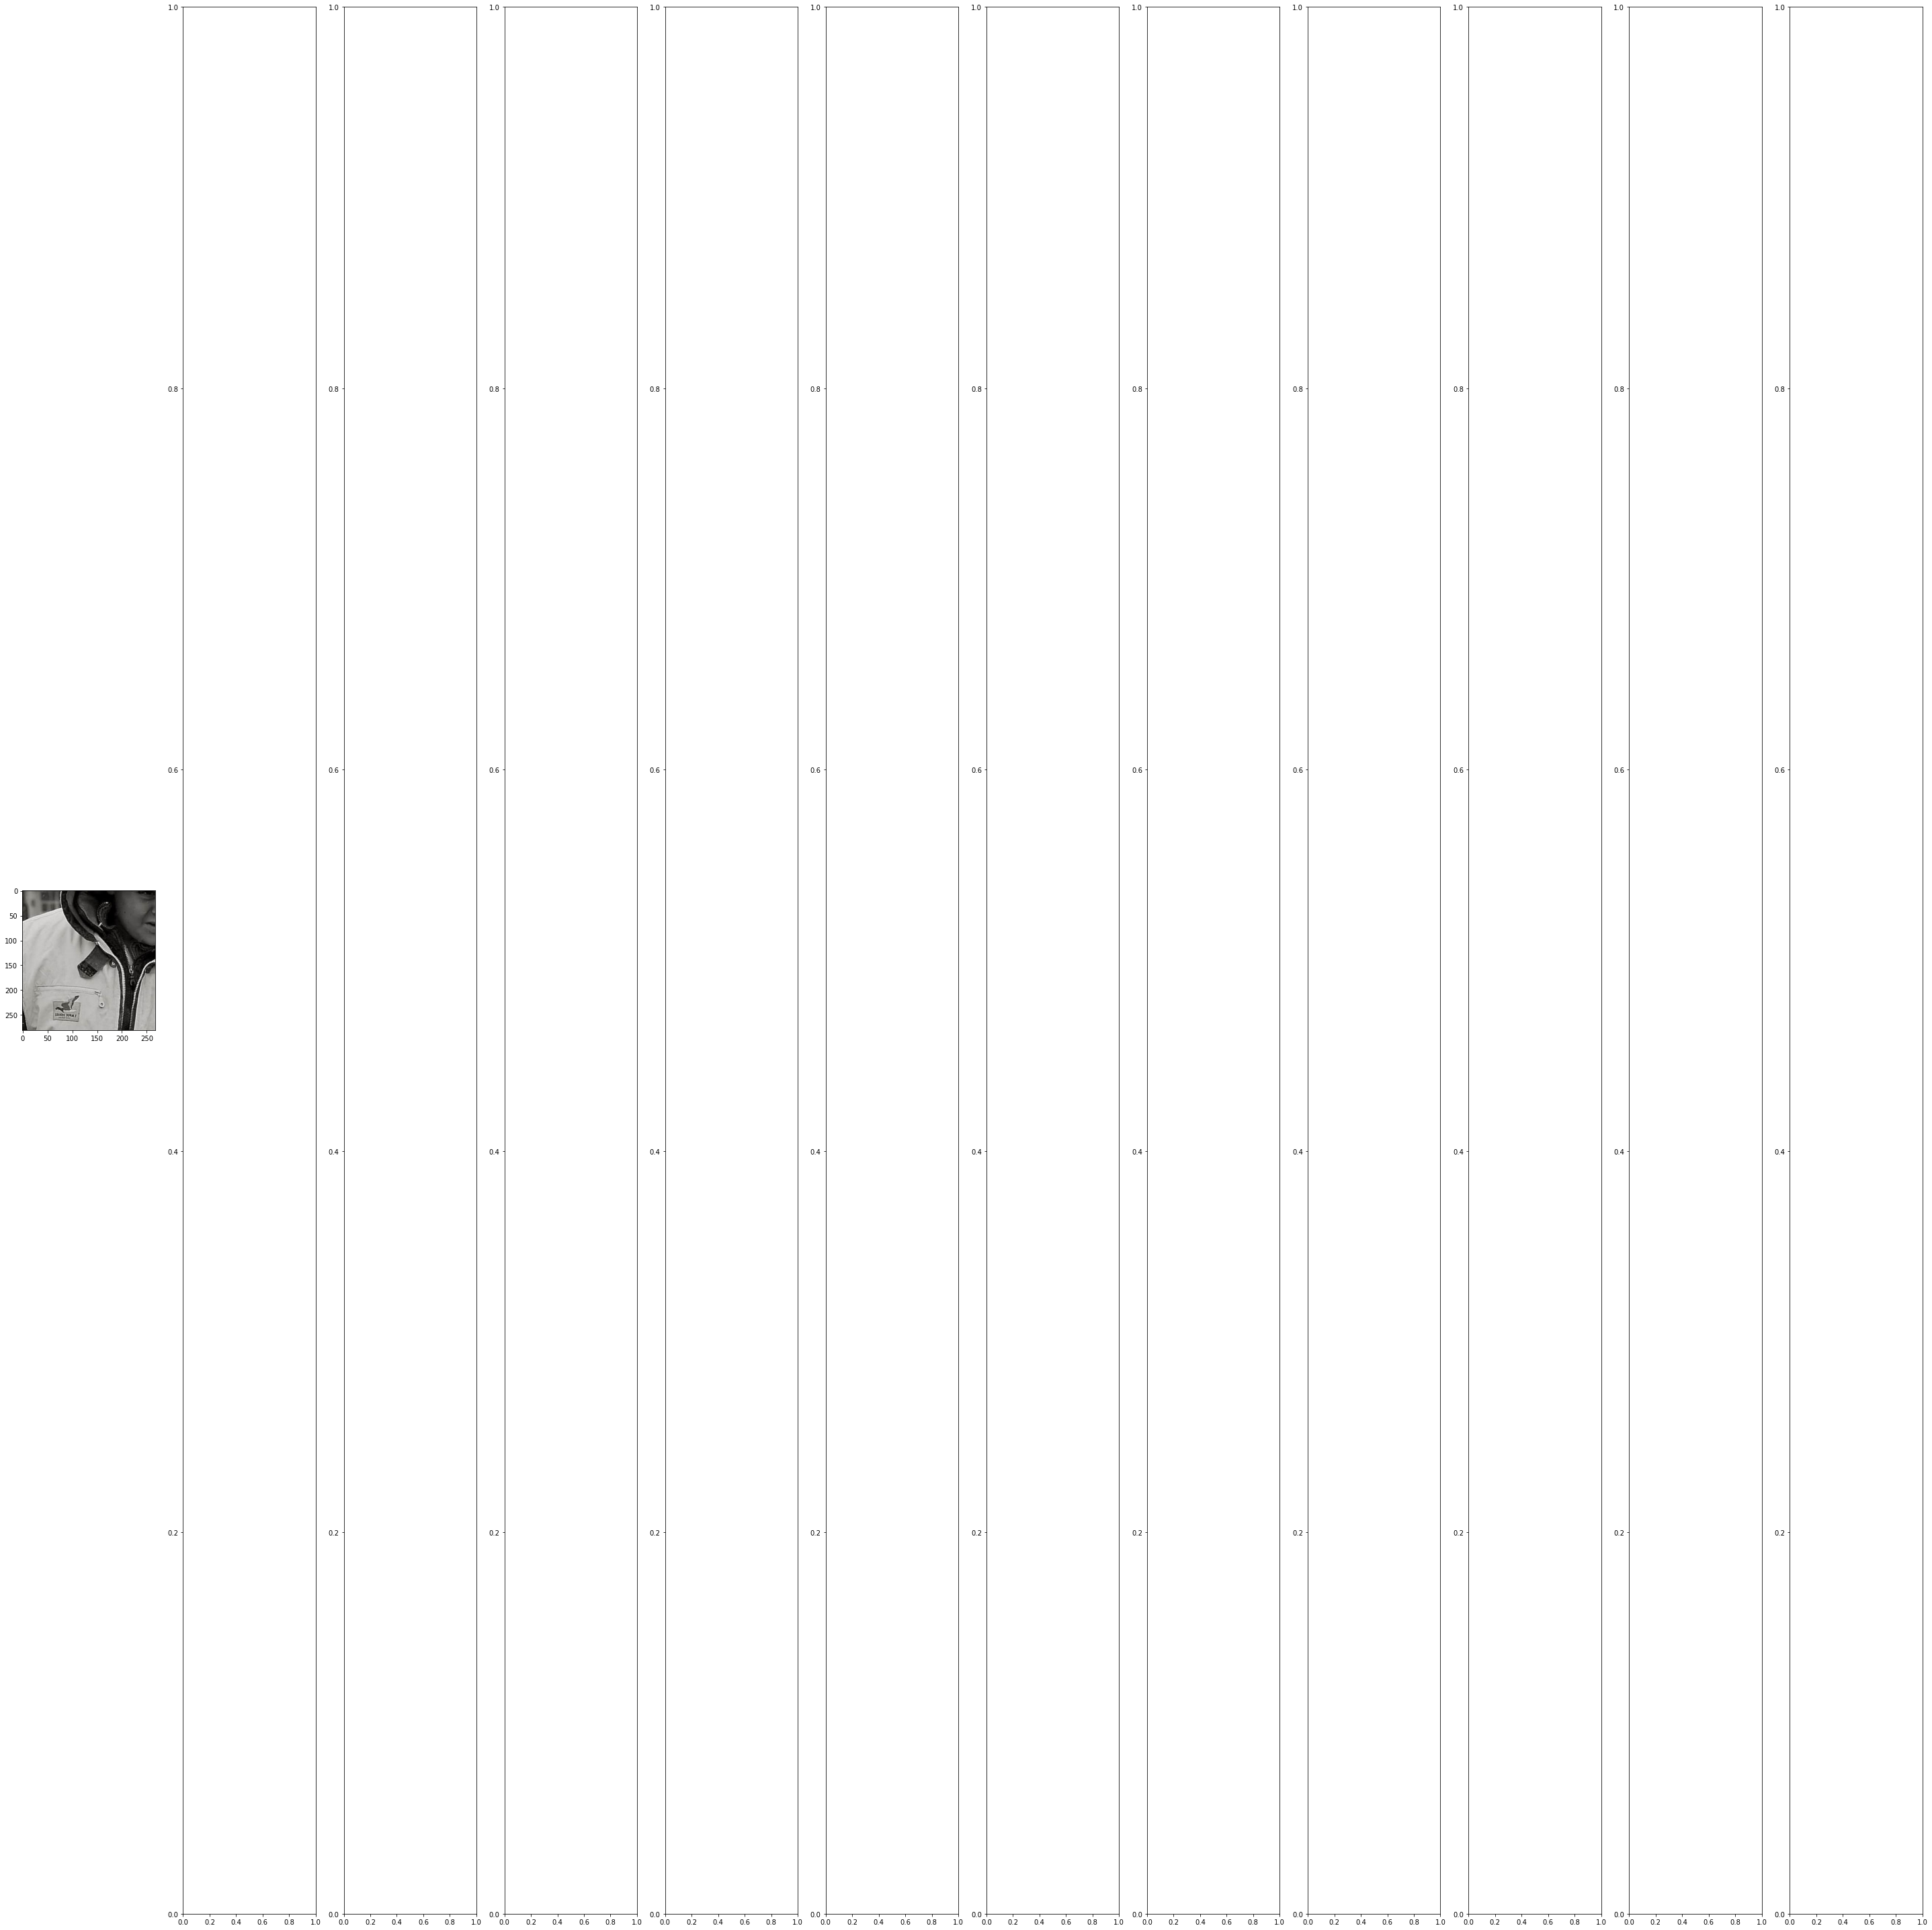

In [58]:
import os

from IPython.display import Image, display
import PIL
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


#modelnames = 'DBPN_x4'
#modelnames = 'SRFBN_x3'
#modelnames = 'ESRGAN'

#modelnames += '*'


#sc = 4
#ssc = str(sc)
#dirs = glob.glob('/opt/notebooks/Myresults/' + modelnames + '/')

dirs = glob.glob('/opt/notebooks/Myresults/*/')

ndir = len(dirs)

imname = '*'
orignames = glob.glob('/opt/notebooks/MyImages/' + imname)
print(orignames)

for i in range(0,len(orignames)):
  
  fig, axes = plt.subplots(nrows=1, ncols=1+ndir)
  fig.set_size_inches((40,40))
  fig.tight_layout()
  
  #original
  orig = orignames[i]
  imgLr = mpimg.imread(orig)
  axes[0].imshow(imgLr)
   
  for j in range(0,len(dirs)):
    
    mydir = dirs[j]
  
    #new file
    path, file = os.path.split(orig)
    file, ext = os.path.splitext(file)
    #print(file)  
    newfile = glob.glob(mydir + file + '*')[0]

    imgRr = mpimg.imread(newfile)
    axes[1+j].imshow(imgRr)
    #if j == 0:
    axes[1+j].set_title(mydir+file)
  

  
  
  